### Noise calculations for paper revisions


This notebook explores the model training noise as requested during the first round of paper review.

We use the conda environment `analysis`


#### Define paths to model files

In [173]:
root = '/network/group/aopp/predict/TIP016_PAXTON_RPSPEEDY/ML4L/ECMWF_files/raw/processed_data/trained_models/'
model_1 = f'{root}V15_noise_expt_1/'
model_2 = f'{root}V15_noise_expt_2/'
model_3 = f'{root}V15_noise_expt_3/'
model_4 = f'{root}V15_noise_expt_4/'

#### Define some useful functions

In [61]:
import pandas as pd
def load_predictions(path):

    df = pd.read_parquet(path+'predictions.parquet')
    
    
    #Calculate some extra columns
    df['model_predicion_bias'] = df.MODIS_LST - df.predictions
    df['model_predicion_error'] = abs(df.MODIS_LST - df.predictions)
        
    df['ERA_predicion_bias'] = df.MODIS_LST - df.skt_unnormalised
    df['ERA_predicion_error'] = abs(df.MODIS_LST - df.skt_unnormalised)


    print ('----------------------------------MODEL-------------------------------------------------')
    print("Mean/Median/Std prediction bias:", df['model_predicion_bias'].mean(), df['model_predicion_bias'].median(),df['model_predicion_bias'].std())
    print("Mean/Median/Std prediction error:", df['model_predicion_error'].mean(), df['model_predicion_error'].median(),df['model_predicion_error'].std())
    # print ('------------------------------------ERA---------------------------------------------------')
    # print("Mean/Median/Std prediction bias:", df['ERA_predicion_bias'].mean(), df['ERA_predicion_bias'].median(),df['ERA_predicion_bias'].std())
    # print("Mean/Median/Std prediction error:", df['ERA_predicion_error'].mean(), df['ERA_predicion_error'].median(),df['ERA_predicion_error'].std())
    # print ('-------------------------------------------------------------------------------------------')

    
    
    #Average predictions and errors over the year
    df_grouped = df.groupby(['latitude_ERA', 'longitude_ERA'],as_index=False).mean() 
    
    
    
    
    
    return df,df_grouped

import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec
import cartopy.crs as ccrs
import matplotlib.colors as mc
import matplotlib.colorbar as cb 




        
        
        
def global_plot(df,z,projection,vmin,vmax,cmap,absolute_values,logscale,title,markersize,savefig):
    
    
        
       # ccrs.Robinson()
        
    #Setup plotting env
    fig = plt.figure(figsize=[30,20])
    ax = plt.subplot(projection=projection)
    cax = fig.add_axes([0.32, 0.11, 0.4, 0.0125])

    #Get data
    try:
        x = df.longitude
        y = df.latitude
    except: #different sources call lat/lon different things
        x = df.longitude_ERA
        y = df.latitude_ERA

    z1 = df[z]
    if absolute_values:
        z1 = abs(z1)
        if vmin < 0:
            vmin = 0 # dont need negative vmins if plotting absolute values
    
    
    #Normalize, colorbars
    if vmin is None:
        vmin = min(z1)
    if vmax is None:
        vmax = max(z1)
        

     #Cmaps, normalisations
    if logscale:
        norm = mc.LogNorm(vmin=vmin, vmax=vmax)
        z1 = abs(z1)
    else:
        norm = mc.Normalize(vmin=vmin, vmax=vmax)

    
    cb1 = cb.ColorbarBase(cax, cmap=cmap,
                                norm=norm,
                                orientation='horizontal')
    
    
    
    
    
    
    #Scatter points
    sc = ax.scatter(x,y,transform=ccrs.PlateCarree(), #Always PlateCarree
                    s=markersize,
                    c=cmap(norm(z1)),
                    linewidths=1, 
                    alpha=.7)


    #Latitude cutoffs
    ax.plot([-180,180],[70,70],transform=ccrs.PlateCarree(),c='0.5', linestyle='--')
    ax.plot([-180,180],[-70,-70],transform=ccrs.PlateCarree(),c='0.5', linestyle='--')


    #Formatting
    cax.tick_params(labelsize=30)
    cax.set_xlabel(r'$\delta$K',fontsize=34)

    ax.set_title(title)    
    ax.coastlines()
    ax.set_aspect('auto') #Force projection aspect ratio
    #ax.set_xlim(-180,180)

    if savefig is not None:
        plt.savefig(savefig,bbox_inches='tight', pad_inches=0, dpi=300)   
        
        
        
        
            

In [174]:
models_to_compare = [model_1,model_2, model_3,model_4]


annually_averaged_dfs = []
for m in models_to_compare:
    predictions,predictions_averaged = load_predictions(m)
    annually_averaged_dfs.extend([predictions_averaged])



----------------------------------MODEL-------------------------------------------------
Mean/Median/Std prediction bias: 0.08259364 0.226959228515625 3.8190529346466064
Mean/Median/Std prediction error: 2.9854784 2.280975341796875 2.499044418334961


<ipython-input-61-019f89ba43d9>:26: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_grouped = df.groupby(['latitude_ERA', 'longitude_ERA'],as_index=False).mean()


----------------------------------MODEL-------------------------------------------------
Mean/Median/Std prediction bias: 0.17329945 0.29364013671875 3.8254127502441406
Mean/Median/Std prediction error: 2.9893332 2.27545166015625 2.509122133255005


<ipython-input-61-019f89ba43d9>:26: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_grouped = df.groupby(['latitude_ERA', 'longitude_ERA'],as_index=False).mean()


----------------------------------MODEL-------------------------------------------------
Mean/Median/Std prediction bias: 0.0777295 0.20306396484375 3.8673462867736816
Mean/Median/Std prediction error: 3.0292234 2.315216064453125 2.526977300643921


<ipython-input-61-019f89ba43d9>:26: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_grouped = df.groupby(['latitude_ERA', 'longitude_ERA'],as_index=False).mean()


----------------------------------MODEL-------------------------------------------------
Mean/Median/Std prediction bias: 0.06500694 0.195526123046875 3.8166935443878174
Mean/Median/Std prediction error: 2.9783933 2.266021728515625 2.5020196437835693


<ipython-input-61-019f89ba43d9>:26: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_grouped = df.groupby(['latitude_ERA', 'longitude_ERA'],as_index=False).mean()


#### Load the change in fields file - we will use this to categorise gridpoints

In [175]:
change_in_fields = pd.read_pickle('tmp_data/change_in_fields.pkl')
change_in_fields['latitude_join'] = round(change_in_fields.latitude_ERA,3)
change_in_fields['longitude_join'] = round(change_in_fields.longitude_ERA,3) #just used for joining due to loss of precision from Margs file

In [198]:
change_in_fields.columns

Index(['latitude_ERA', 'longitude_ERA', 'V15_clFr', 'V15_cvhFr', 'V15_cvlFr',
       'V15_dl', 'V15_oceanFr', 'V15_si10Fr', 'V15_z', 'V20_clFr', 'V20_cvhFr',
       'V20_cvlFr', 'V20_dl', 'V20_oceanFr', 'V20_si10Fr', 'V20_z',
       'changeAbs_V20V15_clFr', 'changeAbs_V20V15_cvhFr',
       'changeAbs_V20V15_cvlFr', 'changeAbs_V20V15_oceanFr',
       'changeAbs_V20V15_si10Fr', 'changeAbs_V20V15_dl', 'changeAbs_V20V15_z',
       'clFr_change_is_significant', 'cvhFr_change_is_significant',
       'cvlFr_change_is_significant', 'oceanFr_change_is_significant',
       'si10Fr_change_is_significant', 'dl_change_is_significant',
       'z_change_is_significant', 'bitstring', 'latitude_join',
       'longitude_join'],
      dtype='object')

#### Create a new df and concat it with the change in fields df

In [176]:
#Create a new df that will just hold the differences   

df =annually_averaged_dfs[0] #pick a df to get latitudes 
data = { 'latitude_ERA':     df.latitude_ERA, 
         'longitude_ERA':    df.longitude_ERA,
         'MODIS_LST':        df.MODIS_LST,
          'latitude_join':    round(df.latitude_ERA,3), 
          'longitude_join':    round(df.longitude_ERA,3)}


i = 1
selected_cols = [] #we will use this later when computing variances
for df in annually_averaged_dfs:
    data[f'prediction_error_{i}'] = df['model_predicion_error']
    data[f'prediction_{i}'] = df['predictions']

    selected_cols.extend([f'prediction_error_{i}'])
    i = i+1

df_new = pd.DataFrame(data)   

In [177]:
#Join and save
df_cat = pd.merge(df_new,change_in_fields,how='inner',on=['latitude_join', 'longitude_join'],suffixes=('', '_y')) #inner join.
df_cat = df_cat.drop(['latitude_join', 'longitude_join','latitude_ERA_y', 'longitude_ERA_y'], axis=1) #Get rid of junk columns

#### LAKES

In [203]:
pd.options.mode.chained_assignment = None #Ignore SettingWithCopyWarning - we are safe here


def surface_noise_numbers(df):
    df['variance']=df[selected_cols].var(axis=1) #variance over the prediciton errors i.e. noise 
    df['median_error']=df[selected_cols].median(axis=1) #mean over the prediciton errors 
    df['mean_error']=df[selected_cols].mean(axis=1) #mean over the prediciton errors 
    
    print("Numer of grid points:", len(df))
    print("Median variance:", df['variance'].median())
    print("Mean variance:", df['variance'].mean())
    
    print("Median median error:", df['median_error'].median())
    print("Mean mean error:", df['mean_error'].mean())
    
    df['variance'].hist(bins=100,figsize=(12,8))




Numer of grid points: 1631
Median variance: 0.008567211218178272
Mean variance: 0.18161985
Median median error: 2.7064685821533203
Mean mean error: 3.1902435


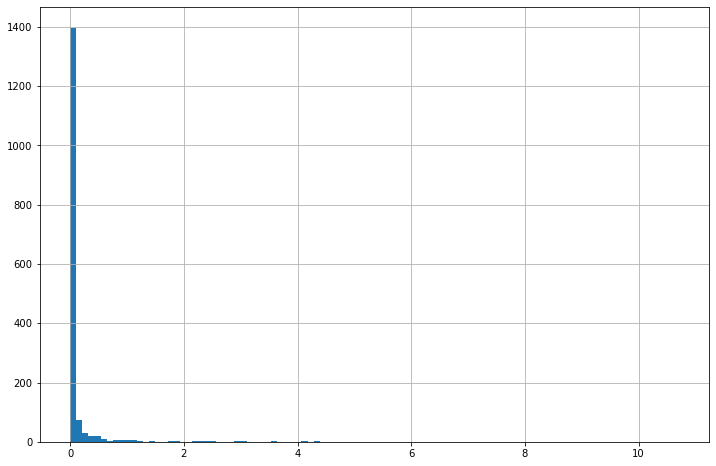

In [204]:
df_lake = df_cat.query('clFr_change_is_significant & dl_change_is_significant & not oceanFr_change_is_significant & not si10Fr_change_is_significant')
surface_noise_numbers(df_lake)

In [205]:
df_lake

,latitude_ERA,longitude_ERA,MODIS_LST,prediction_error_1,prediction_1,prediction_error_2,prediction_2,prediction_error_3,prediction_3,prediction_error_4,...,cvhFr_change_is_significant,cvlFr_change_is_significant,oceanFr_change_is_significant,si10Fr_change_is_significant,dl_change_is_significant,z_change_is_significant,bitstring,variance,median_error,mean_error
2298,-54.379367,-68.906250,278.404236,2.932979,276.383575,2.512748,277.031494,2.310007,277.640930,2.243198,...,False,False,False,False,True,False,1001000,0.096559,2.411377,2.499733
2524,-51.007004,-73.750000,274.123169,4.816545,275.111725,5.288032,275.785950,5.167870,274.520111,4.902350,...,False,False,False,False,True,False,1001000,0.048898,5.035110,5.043699
2640,-49.320823,-74.583333,279.504425,4.760699,275.700714,4.083141,276.669220,4.616580,275.989258,3.996458,...,False,False,False,False,True,False,1001000,0.145045,4.349860,4.364219
2693,-48.758762,-74.000000,275.387543,3.436432,276.164429,3.838189,276.796082,3.646682,275.872101,3.621224,...,False,True,False,False,True,False,1011000,0.027013,3.633953,3.635632
2762,-48.196702,-66.400000,292.468079,2.923074,292.568604,3.029530,292.389893,3.116231,291.987213,3.274108,...,False,False,False,False,True,False,1001000,0.022011,3.072881,3.085736
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149748,70.117048,130.500000,261.509766,3.839574,261.287903,3.760233,260.972443,3.424365,261.413513,3.878855,...,False,True,False,False,True,False,1011000,0.042806,3.799904,3.725757
149769,70.117048,146.250000,259.166626,2.950216,260.663452,2.999373,260.977509,2.793789,260.426605,2.807885,...,False,True,False,False,True,False,1011000,0.010523,2.879051,2.887816
149770,70.117048,147.000000,259.823456,2.921776,261.298187,3.033228,261.639099,2.826963,260.957520,2.843283,...,False,True,False,False,True,False,1011000,0.008872,2.882529,2.906312
149780,70.117048,154.500000,260.750122,3.073905,262.178558,3.093780,262.130035,3.051725,261.953247,3.153682,...,False,True,False,False,True,False,1011000,0.001917,3.083842,3.093273


#### Lake ground

In [206]:
df_lake_ground = df_cat.query('clFr_change_is_significant & dl_change_is_significant & not oceanFr_change_is_significant & not cvhFr_change_is_significant & not cvlFr_change_is_significant')


Numer of grid points: 546
Median variance: 0.02431214600801468
Mean variance: 0.41963476
Median median error: 2.9327445030212402
Mean mean error: 3.953188


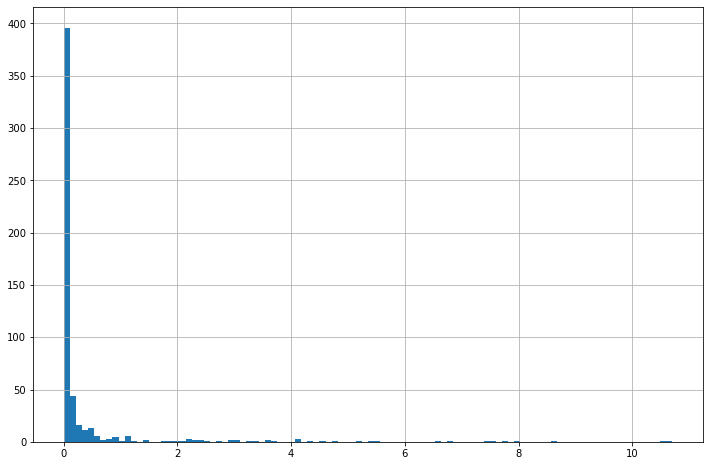

In [207]:
surface_noise_numbers(df_lake_ground)

#### Vegetation

In [208]:
df_vegetation = df_cat.query('cvhFr_change_is_significant & not clFr_change_is_significant')


In [214]:
df_vegetation

,latitude_ERA,longitude_ERA,MODIS_LST,prediction_error_1,prediction_1,prediction_error_2,prediction_2,prediction_error_3,prediction_3,prediction_error_4,...,cvhFr_change_is_significant,cvlFr_change_is_significant,oceanFr_change_is_significant,si10Fr_change_is_significant,dl_change_is_significant,z_change_is_significant,bitstring,variance,median_error,mean_error
2502,-51.288034,-73.333333,274.249908,4.092721,274.745667,4.160023,275.947052,4.231966,273.951111,4.559295,...,True,True,False,True,True,False,0111010,0.042779,4.195994,4.261001
2670,-49.039793,-72.916667,280.344543,4.903582,275.720154,3.821733,277.123108,4.398436,276.323151,5.575669,...,True,True,False,True,True,False,0111010,0.556002,4.651009,4.674855
2695,-48.758762,-73.200000,275.938141,4.156383,274.055023,4.867414,276.053986,3.224139,274.968842,5.171515,...,True,False,False,True,True,False,0101010,0.749186,4.511899,4.354863
2722,-48.477732,-72.400000,280.743073,5.803517,275.570618,4.595463,277.033966,4.652559,276.900085,4.732150,...,True,False,False,True,True,False,0101010,0.330017,4.692355,4.945923
2771,-47.915672,-72.800000,280.819336,6.250592,275.076904,6.059758,275.438110,4.859448,276.940460,5.523778,...,True,False,False,True,True,False,0101010,0.389109,5.791768,5.673394
2818,-47.353611,-73.200000,279.468872,3.568264,278.284149,3.428755,279.598358,4.581016,276.785797,4.673910,...,True,True,False,True,True,False,0111010,0.429527,4.074640,4.062986
2844,-47.072581,-73.200000,278.869751,5.801939,274.462921,4.824302,276.860138,6.244302,274.549561,6.404693,...,True,False,False,True,True,False,0101010,0.504544,6.023121,5.818810
2873,-46.791551,-73.200000,278.926392,5.143209,277.081268,6.029955,280.708893,4.216102,279.474487,9.115961,...,True,True,False,False,True,False,0111000,4.520893,5.586582,6.126307
2903,-46.510520,-73.125000,281.607971,4.764214,277.526550,4.171246,278.374756,5.785377,276.373291,5.700918,...,True,False,False,False,True,False,0101000,0.602021,5.232566,5.105439
2933,-46.229490,-73.125000,281.318878,4.167439,277.387329,3.846241,277.913544,5.080311,276.432953,4.865546,...,True,False,False,False,True,False,0101000,0.335991,4.516493,4.489884


Numer of grid points: 58
Median variance: 0.0602572001516819
Mean variance: 0.25073928
Median median error: 3.205206871032715
Mean mean error: 3.4500153


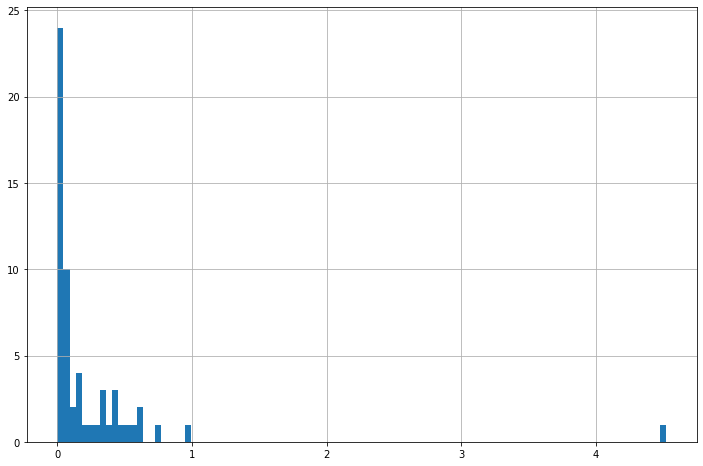

In [213]:
surface_noise_numbers(df_vegetation)

#### Glacier

Numer of grid points: 1057
Median variance: 0.07401303946971893
Mean variance: 0.16656251
Median median error: 4.473470687866211
Mean mean error: 4.665841


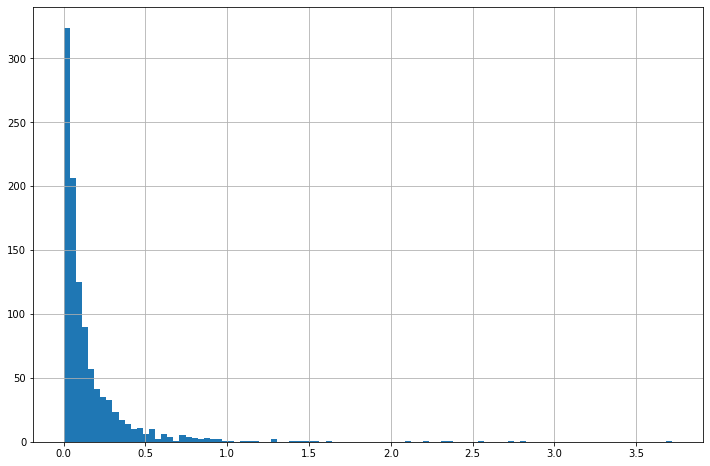

In [210]:
df_glacier = df_cat.query('si10Fr_change_is_significant')
surface_noise_numbers(df_glacier)

#### Deep dive on individual bad points

In [211]:
lake_natron = df_lake.query('latitude_ERA == -2.3887580539270044 & longitude_ERA == 36.0000')
lake_natron_northern_edge =df_lake.query('latitude_ERA == -2.10772769472398 & longitude_ERA == 36.0000') 
lake_blanche =df_lake.query('latitude_ERA ==  -29.367671674745356 & longitude_ERA == 139.6875') 
salt_lake_city =df_lake.query('latitude_ERA ==  41.17094491970063 & longitude_ERA ==  -113.39999999999998') 
farah_province =df_lake.query('latitude_ERA ==  31.615914311651938 & longitude_ERA == 61.120000000000005') 
gujarat_province =df_lake.query('latitude_ERA ==  24.028095261448925 & longitude_ERA ==  69.0') 
toshka_lakes =df_lake.query('latitude_ERA ==  23.18500423251539 & longitude_ERA ==  30.900000000000006') 
all_northern_canada_points = df_lake.query('50.0 < latitude_ERA & -130 < longitude_ERA < -80')

caspain_1 = df_lake.query('latitude_ERA ==  46.22948997297545 & longitude_ERA ==   49.125')
caspain_2 = df_lake.query('latitude_ERA ==  46.22948997297545 & longitude_ERA ==    49.5')
caspain_3 = df_lake.query('latitude_ERA ==  46.51052023808231 & longitude_ERA ==    49.5')
caspain_4 = df_lake.query('latitude_ERA ==  47.072580762649004 & longitude_ERA ==    51.599999999999994')

caspian_edge = pd.concat([caspain_1,caspain_2,caspain_3,caspain_4])

bering_glacier = df_glacier.query('latitude_ERA == 60.280999861571715   & longitude_ERA ==    -143.4666666666667')
juncal_glacier = df_glacier.query('latitude_ERA == -33.021065936911214   & longitude_ERA ==    -70.07999999999998')


In [186]:
selected_dfs = dict({'lake_natron':lake_natron,
                     'lake_natron_northern_edge':lake_natron_northern_edge,
                     'lake_blanche':lake_blanche,
                     'salt_lake_city':salt_lake_city,
                     'farah_province':farah_province,
                     'gujarat_province':gujarat_province,
                     'toshka_lakes':toshka_lakes,
                     'all_northern_canada_points':all_northern_canada_points,
                     'caspian_edge':caspian_edge,
                     'bering_glacier':bering_glacier,
                     'juncal_glacier':juncal_glacier})

lake_natron
Numer of grid points: 1
Median variance: 0.019072890281677246
Mean variance: 0.01907289
Median median error: 3.610163688659668
Mean mean error: 3.6042576
************************
lake_natron_northern_edge
Numer of grid points: 1
Median variance: 0.022181862965226173
Mean variance: 0.022181863
Median median error: 3.132234573364258
Mean mean error: 3.10576
************************
lake_blanche
Numer of grid points: 1
Median variance: 0.9169919490814209
Mean variance: 0.91699195
Median median error: 3.2879390716552734
Mean mean error: 3.6252828
************************
salt_lake_city
Numer of grid points: 1
Median variance: 0.0896233394742012
Mean variance: 0.08962334
Median median error: 3.876434803009033
Mean mean error: 3.967183
************************
farah_province
Numer of grid points: 1
Median variance: 0.0002551457437220961
Mean variance: 0.00025514574
Median median error: 2.87972092628479
Mean mean error: 2.8749602
************************
gujarat_province
Numer of 

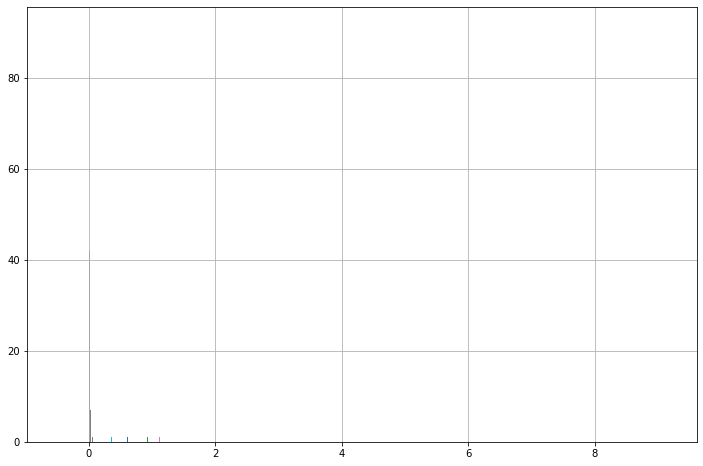

In [215]:
for key,value in selected_dfs.items():
    print(key)
    surface_noise_numbers(value)
    print("************************")

In [193]:
toshka_lakes[['MODIS_LST', 'prediction_1','prediction_2','prediction_3','prediction_4']]

,MODIS_LST,prediction_1,prediction_2,prediction_3,prediction_4
70081,318.107666,316.439697,314.425262,316.792664,313.698792


In [196]:
gujarat_province[['MODIS_LST', 'prediction_1','prediction_2','prediction_3','prediction_4']]

,MODIS_LST,prediction_1,prediction_2,prediction_3,prediction_4
71526,313.741486,309.216736,309.648285,302.657593,309.395355


In [195]:
gujarat_province

,latitude_ERA,longitude_ERA,MODIS_LST,prediction_error_1,prediction_1,prediction_error_2,prediction_2,prediction_error_3,prediction_3,prediction_error_4,...,changeAbs_V20V15_z,clFr_change_is_significant,cvhFr_change_is_significant,cvlFr_change_is_significant,oceanFr_change_is_significant,si10Fr_change_is_significant,dl_change_is_significant,z_change_is_significant,bitstring,variance
71526,24.028095,69.0,313.741486,5.290875,309.216736,5.206067,309.648285,11.188568,302.657593,5.452314,...,0.267944,True,False,False,False,False,True,True,1001001,8.630967


In [190]:
gujarat_province

,latitude_ERA,longitude_ERA,MODIS_LST,prediction_error_1,prediction_1,prediction_error_2,prediction_2,prediction_error_3,prediction_3,prediction_error_4,...,changeAbs_V20V15_z,clFr_change_is_significant,cvhFr_change_is_significant,cvlFr_change_is_significant,oceanFr_change_is_significant,si10Fr_change_is_significant,dl_change_is_significant,z_change_is_significant,bitstring,variance
71526,24.028095,69.0,313.741486,5.290875,309.216736,5.206067,309.648285,11.188568,302.657593,5.452314,...,0.267944,True,False,False,False,False,True,True,1001001,8.630967


In [146]:
juncal_glacier['longitude_ERA'].to_numpy()[0]

-70.07999999999998

In [199]:
juncal_glacier

,latitude_ERA,longitude_ERA,MODIS_LST,prediction_error_1,prediction_1,prediction_error_2,prediction_2,prediction_error_3,prediction_3,prediction_error_4,...,changeAbs_V20V15_z,clFr_change_is_significant,cvhFr_change_is_significant,cvlFr_change_is_significant,oceanFr_change_is_significant,si10Fr_change_is_significant,dl_change_is_significant,z_change_is_significant,bitstring,variance
6228,-33.021066,-70.08,290.502838,4.377077,289.279449,3.396034,289.043396,3.773364,289.165131,5.182201,...,0.957031,False,False,False,False,True,True,False,0001010,0.607728
